Summary of Analysis:
1. Number of Hours of Sleep AND Quality of Sleep is most highly correlated with stress levels, not the presence of a sleep disorder, activity level, or any other health indicators
2. While insomnia and sleep apnea are correlated with slightly few hours of sleep overall, stress levels are most highly correlated with both number of hours and quality of sleep
3. The professions with the worst sleep are sales reps and scientists. The ones with the best are engineers and lawyers, perhaps changing the answer to "how do you sleep at night"
4. males tend to sleep slightly fewer hours on average vs females (7 vs 7.22), HOWEVER men are more likely to rate their quality of sleep as worse compared to females (6.97 vs 7.66)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sleep = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep.shape

(374, 13)

In [13]:
#get a better value for blood pressure
sleep[['systolic', 'diastolic']] = sleep['Blood Pressure'].str.split('/', expand=True).astype(float)

In [14]:
sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic,diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


look at correlations matrix

In [37]:
print(sleep['Sleep Disorder'].unique())

['None' 'Sleep Apnea' 'Insomnia']


In [38]:
#get dummy values for profession and BMI category
sleep_dummies = pd.get_dummies(sleep, columns=['Sleep Disorder'], drop_first=False)

In [40]:
correlation_matrix = sleep_dummies.corr()

/var/folders/v1/ymptnwwx3x1b7_mw0nns09wr0000gn/T/ipykernel_67444/2605023337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sleep_dummies.corr()


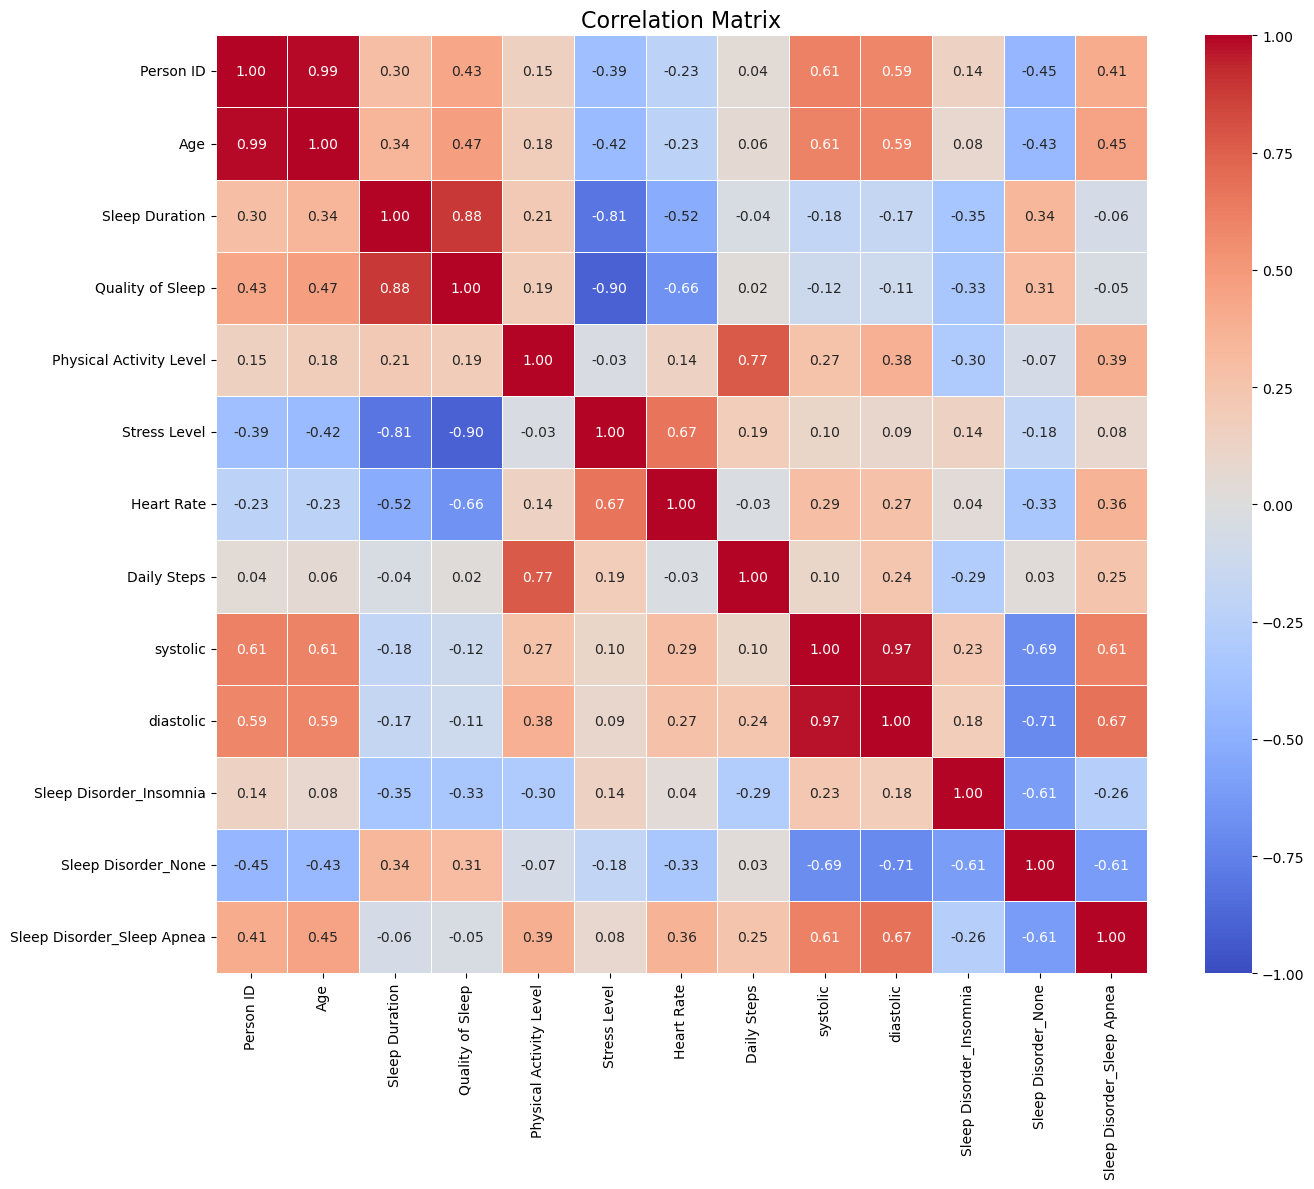

In [41]:
# Set the figure size to make it larger
plt.figure(figsize=(14, 12))

# Create the heatmap with a mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5,vmin=-1, vmax=1)

# Add title and show the plot
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
#what is the profession with the worst sleep
worst_sleep_profession = sleep.groupby('Occupation')['Sleep Duration'].mean().sort_values()
worst_sleep_profession.head(15)

Occupation
Sales Representative    5.900000
Scientist               6.000000
Salesperson             6.403125
Teacher                 6.690000
Software Engineer       6.750000
Manager                 6.900000
Doctor                  6.970423
Nurse                   7.063014
Accountant              7.113514
Lawyer                  7.410638
Engineer                7.987302
Name: Sleep Duration, dtype: float64

In [34]:
#what is the profession with the worst sleep
worst_sleep_profession = sleep.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
worst_sleep_profession.head(15)

Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: Quality of Sleep, dtype: float64

In [35]:
#who sleeps better, men or women
worst_sleep_gender = sleep.groupby('Gender')['Sleep Duration'].mean()
worst_sleep_gender.head()

Gender
Female    7.229730
Male      7.036508
Name: Sleep Duration, dtype: float64

In [36]:
#who sleeps better, men or women
worst_sleep_gender = sleep.groupby('Gender')['Quality of Sleep'].mean()
worst_sleep_gender.head()

Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64